# Week 10 handin

## Assignment

#### Exercise meanshift
1. load 'iris_data.csv' into a dataframe
2. get unique labels (Species column)
3. plot with a scatter plot each iris flower sample colored by label (3 different colors)
4. use: `MeanShift` and `estimate_bandwidth` from `sklearn.cluster` to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: `quantile` set it to `0.2` for best result)
5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function)
6. create a new scatter plot where each flower is colored according to cluster label
7. add a dot for the cluster centers
8. Compare the 2 plots (colored by actual labels vs. colored by cluster label)
9. Try changing the 'quantile' argument to 0.15 and see what happens to your cluster plot.

## Status
1. done
2. done
3. done
4. done
5. done
6. done
7. done
8. done
9. done

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

#### 1. load 'iris_data.csv' into a dataframe

In [2]:
data = pd.read_csv('../data/iris_data.csv', decimal=",")
data_noPetals = data.drop(['Petal length', 'Petal width'], axis=1)
data_noPetals

,Sepal length,Sepal width,Species
0,5.1,3.5,I. setosa
1,4.9,3.0,I. setosa
2,4.7,3.2,I. setosa
3,4.6,3.1,I. setosa
4,5.0,3.6,I. setosa
...,...,...,...
145,6.7,3.0,I. virginica
146,6.3,2.5,I. virginica
147,6.5,3.0,I. virginica
148,6.2,3.4,I. virginica


#### 2. get unique labels (Species column)

In [3]:
#Vi opretter en liste som indeholder unikke Species værdier
labelList = data_noPetals.Species.unique()
labelList

array(['I. setosa', 'I. versicolor', 'I. virginica'], dtype=object)

#### 3. plot with a scatter plot each iris flower sample colored by label (3 different colors

<IPython.core.display.Javascript object>


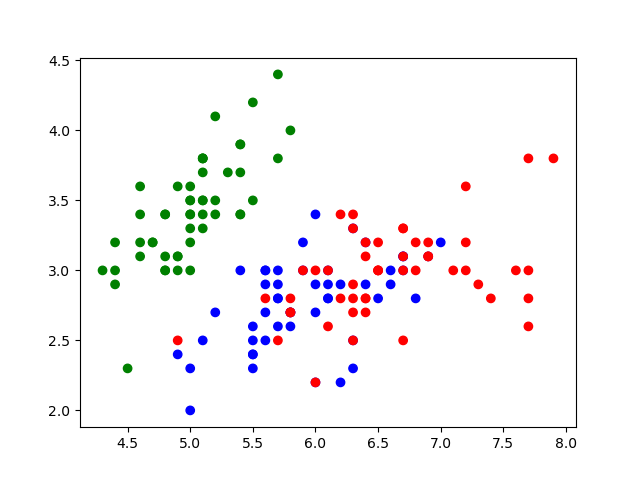

In [11]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

colorList = {labelList[0] : 'green', labelList[1] : 'blue', labelList[2] : 'red'}

ax1.scatter(data_noPetals['Sepal length'], data_noPetals['Sepal width'], c=data_noPetals['Species'].apply(lambda x: colorList[x]))

####  4. use: `MeanShift` and `estimate_bandwidth` from `sklearn.cluster` to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: `quantile` set it to `0.2` for best result)

In [5]:
from sklearn import preprocessing
from sklearn.cluster import MeanShift, estimate_bandwidth
data_noPetals_encoded = data_noPetals[:]
label_enc = preprocessing.LabelEncoder()
data_noPetals_encoded['Species'] = label_enc.fit_transform(data_noPetals_encoded['Species'].astype(str))

print(data_noPetals_encoded)

#cleaning data from nonsensical data entries
bool_matrix = data_noPetals_encoded.isnull()
only_null_filter = bool_matrix.any(axis=1)
missing = data_noPetals_encoded[only_null_filter]
data_noPetals_encoded_cleaned = data_noPetals_encoded.dropna()

     Sepal length  Sepal width  Species
0             5.1          3.5        0
1             4.9          3.0        0
2             4.7          3.2        0
3             4.6          3.1        0
4             5.0          3.6        0
..            ...          ...      ...
145           6.7          3.0        2
146           6.3          2.5        2
147           6.5          3.0        2
148           6.2          3.4        2
149           5.9          3.0        2

[150 rows x 3 columns]


In [6]:
data_noPetals_encoded_cleaned_noSpecies = data_noPetals_encoded_cleaned.drop(['Species'], axis=1)
eb = estimate_bandwidth(data_noPetals_encoded_cleaned_noSpecies, quantile=0.22)

print("Estimated bandwidth = ", eb)

Estimated bandwidth =  0.615592620054482


#### 5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function)

In [7]:
import numpy as np

analyzer = MeanShift(bandwidth=eb, bin_seeding=True)
analyzer.fit(data_noPetals_encoded_cleaned_noSpecies)

labels = analyzer.labels_
clusters = np.unique(labels)
n_clusters = len(clusters)
cluster_centers = analyzer.cluster_centers_

print('Labels: ', clusters)
print('\nNumber of clusters: ', n_clusters)
print('\nCluster center koordinator:\n', cluster_centers)

Labels:  [0 1 2]

Number of clusters:  3

Cluster center koordinator:
 [[6.13833333 2.915     ]
 [4.985      3.3725    ]
 [7.8        3.8       ]]


#### 6. create a new scatter plot where each flower is colored according to cluster label 
#### &
#### 7. add a dot for the cluster centers

<IPython.core.display.Javascript object>


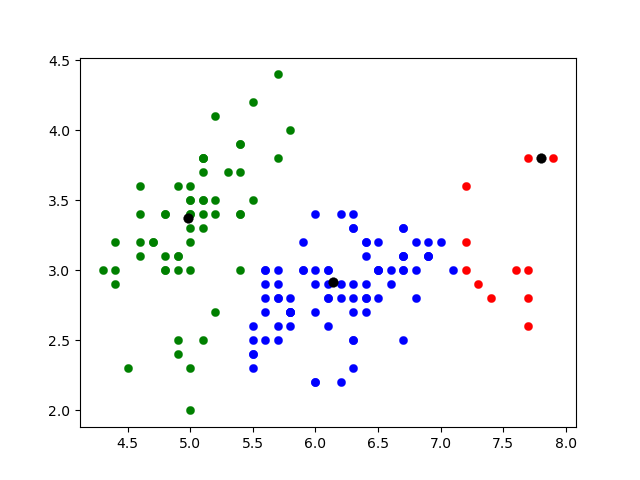

In [8]:
from itertools import cycle

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]

    x, y = data_noPetals_encoded_cleaned_noSpecies.to_numpy()[my_members,0], data_noPetals_encoded_cleaned_noSpecies.to_numpy()[my_members,1]
    ax2.scatter(x, y, c=col, linewidth=0.2)
    
    # indsætning af cluster centers(sort)
    ax2.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)

#### 8. Compare the 2 plots (colored by actual labels vs. colored by cluster label)

<IPython.core.display.Javascript object>


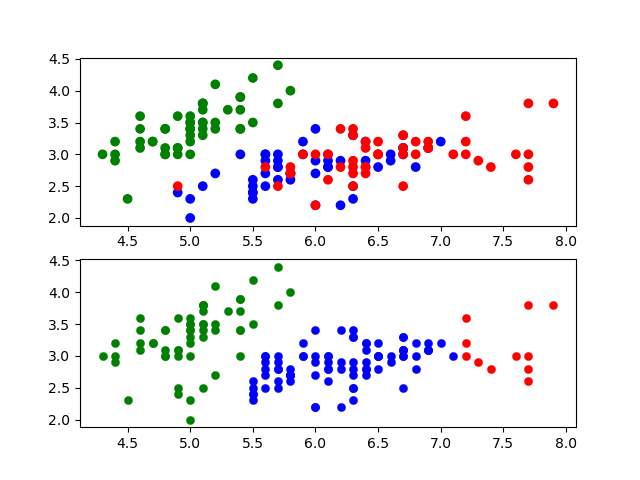

In [9]:
fig3 = plt.figure()
ax1 = fig3.add_subplot(211)
ax2 = fig3.add_subplot(212)

#Først graf
colorList = {labelList[0] : 'green', labelList[1] : 'blue', labelList[2] : 'red'}

ax1.scatter(data_noPetals['Sepal length'], data_noPetals['Sepal width'], c=data_noPetals['Species'].apply(lambda x: colorList[x]))

#Anden graf
colors = cycle('bgrcmy')

for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]

    x, y = data_noPetals_encoded_cleaned_noSpecies.to_numpy()[my_members,0], data_noPetals_encoded_cleaned_noSpecies.to_numpy()[my_members,1]
    ax2.scatter(x, y, c=col, linewidth=0.2)
    

#### 9. Try changing the 'quantile' argument to 0.15 and see what happens to your cluster plot.

<IPython.core.display.Javascript object>


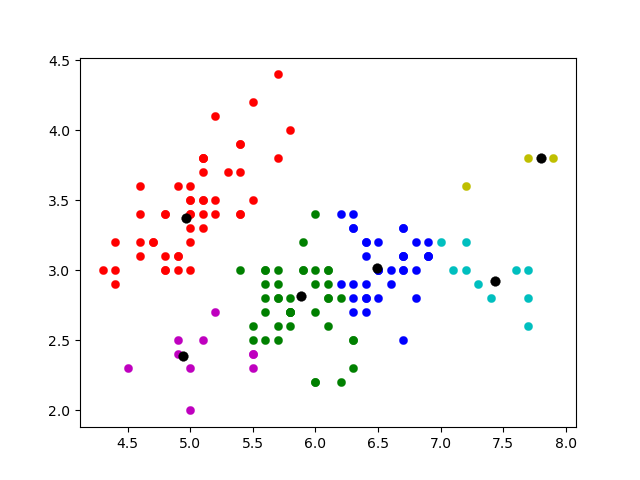

In [10]:
est_band = estimate_bandwidth(data_noPetals_encoded_cleaned_noSpecies, quantile=0.15)
analyzer = MeanShift(bandwidth=est_band, bin_seeding=True)
analyzer.fit(data_noPetals_encoded_cleaned_noSpecies)
labels = analyzer.labels_
clusters = np.unique(labels)
n_clusters = len(clusters)
cluster_centers = analyzer.cluster_centers_

fig = plt.figure()
ax = fig.add_subplot(111)
colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]

    x, y = data_noPetals_encoded_cleaned_noSpecies.to_numpy()[my_members,0], data_noPetals_encoded_cleaned_noSpecies.to_numpy()[my_members,1]
    ax.scatter(x, y, c=col, linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)